# RandomForest 회귀 기본코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.regression import *

# 배깅 회귀
from sklearn.ensemble import RandomForestRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)

### [3] 훈련/검증 데이터 분할 및 데이터 표준화

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, 'MEDV', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## #02. RandomForest 회귀 모형 구현

| 하이퍼파라미터         | 설명                           | 기본값     | 추천사항                                          |
|---------------------|------------------------------|---------|-------------------------------------------------|
| `n_estimators`      | 결정 트리의 수                   | `100`   | 더 많은 트리는 성능 개선 가능, 계산 비용 고려 필요             |
| `criterion`         | 노드 분할 품질 측정 기준              | `"squared_error"` | `"squared_error"`(L2손실 최소화), `"absolute_error"`(L1손실 최소화), `"friedman_mse"`, `"poisson"` 중 선택, 실험을 통해 결정 권장       |
| `max_depth`         | 트리 최대 깊이                   | `None`  | 과적합 방지 위해 제한, 문제 복잡성에 따라 조정 필요            |
| `min_samples_split` | 내부 노드 분할 최소 샘플 수           | `2`     | 너무 낮으면 과적합, 너무 높으면 과소적합, 데이터 크기 고려 조정 필요 |
| `min_samples_leaf`  | 리프 노드 최소 샘플 수              | `1`     | 증가시킬 경우 일반화 증가 가능, 과소적합 주의                   |
| `max_features`      | 분할 시 고려 최대 특성 수            | `"sqrt"`| `"sqrt"`, `"log2"`, `None` 중 선택, 실험을 통해 결정 권장 |


[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.984978 |     0.663217 |
| 평균절대오차(MAE)             |      0.79901 |      2.92083 |
| 평균제곱오차(MSE)             |      1.27901 |      27.4237 |
| 평균오차(RMSE)                |      1.13093 |      5.23677 |
| 평균 절대 백분오차 비율(MAPE) |      4.08632 |      13.3913 |
| 평균 비율 오차(MPE)           |     -1.17807 |     -3.06218 |
+-------------------------------+--------------+--------------+

[학습곡선]


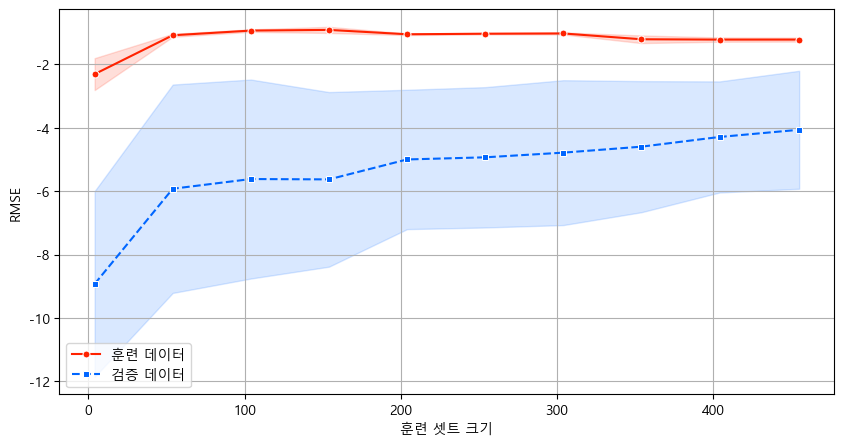

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+



In [4]:
estimator = RandomForestRegressor(
    n_estimators=100,
    criterion="squared_error",
    max_depth=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=get_random_state(),
    n_jobs=get_n_jobs(),
)

estimator.fit(x_train, y_train)

my_regression_result(
    estimator=estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)

my_regression_report(
    estimator=estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)